## 1. Load the data set

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import RandomOverSampler


%matplotlib inline
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#import the dataset
path = "dataset\credit_card.csv"
df = pd.read_csv(path)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kimwo\AppData\Local\Temp\ipykernel_828\1620473683.py:2: SyntaxWarning: invalid escape sequence '\c'
  path = "dataset\credit_card.csv"


In [3]:
#check if the dataset is loaded 
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## 2. Pre-process and clean the dataset

In [4]:
#converr the columns name to lower case
print("Columns before lower case conversion:",df.columns.tolist())
print("*"*50)
df.columns = df.columns.str.lower()
print("Columns after lower case conversion:", df.columns.tolist())

Columns before lower case conversion: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
**************************************************
Columns after lower case conversion: ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class']


In [5]:
#check the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    999 non-null    int64  
 1   v1      999 non-null    float64
 2   v2      999 non-null    float64
 3   v3      999 non-null    float64
 4   v4      999 non-null    float64
 5   v5      999 non-null    float64
 6   v6      999 non-null    float64
 7   v7      999 non-null    float64
 8   v8      999 non-null    float64
 9   v9      999 non-null    float64
 10  v10     999 non-null    float64
 11  v11     999 non-null    float64
 12  v12     999 non-null    float64
 13  v13     999 non-null    float64
 14  v14     999 non-null    float64
 15  v15     999 non-null    float64
 16  v16     999 non-null    float64
 17  v17     999 non-null    float64
 18  v18     999 non-null    float64
 19  v19     999 non-null    float64
 20  v20     999 non-null    float64
 21  v21     999 non-null    float64
 22  v2

For security reasons, the feature names have been anonymized as V1, V2, and so on. Since the "time" column is not relevant in this case, we will drop it in the section below.

In [6]:
#drop the time column
df.drop(columns=['time'])

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.284612,0.303073,-0.067909,0.930684,0.117387,-0.487005,0.204739,-0.174873,0.058270,0.015465,...,-0.023272,-0.043358,-0.209701,-0.446091,0.791745,-0.276971,0.009979,0.013268,14.05,0
995,-0.654892,0.608319,1.585102,-3.009429,0.037593,-1.954023,1.335977,-0.612858,0.690254,-1.681537,...,-0.078527,-0.064194,-0.107350,0.961776,-0.067760,-0.549465,-0.232588,-0.108261,3.90,0
996,-2.101171,-0.227365,1.624668,-0.291123,1.902446,-1.483921,-0.275117,0.085964,-0.563098,-0.376024,...,-0.313782,-0.804784,-0.474101,0.008102,0.259725,0.032376,0.323580,0.034622,1.78,0
997,-1.248163,0.315246,3.708935,0.687280,-0.873071,1.091287,0.297707,-0.633135,1.102317,2.536557,...,-0.824013,0.057907,-0.282351,0.630774,0.283506,-0.204264,0.097555,-0.670480,30.00,0


### Handle Missing Values

In [7]:
#check if any null or na values 
print("Check any null or na values in the dataset")
print("*"*50)
print("Check if column has any null\n", df.isnull().sum())

Check any null or na values in the dataset
**************************************************
Check if column has any null
 time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64


In [8]:
#There is no null or na values in the dataset.
#In the following cell, I will demonstrate how to Median apporach to handle null values if there some missing values in the "amount" column.
df_filled_mdeian = df.fillna(df.median(numeric_only=True))


### Handle Duiplicate Values

In [9]:
#check duiplicate values in each column and print the count of the duplicates
for col in df.columns:
    duiplicate_count = df[col].duplicated().sum()
    print(f"Column:{col}")
    print(f"Duiplicate count:{duiplicate_count}")
    print("*"*50)

Column:time
Duiplicate count:459
**************************************************
Column:v1
Duiplicate count:8
**************************************************
Column:v2
Duiplicate count:8
**************************************************
Column:v3
Duiplicate count:8
**************************************************
Column:v4
Duiplicate count:8
**************************************************
Column:v5
Duiplicate count:8
**************************************************
Column:v6
Duiplicate count:8
**************************************************
Column:v7
Duiplicate count:8
**************************************************
Column:v8
Duiplicate count:8
**************************************************
Column:v9
Duiplicate count:8
**************************************************
Column:v10
Duiplicate count:8
**************************************************
Column:v11
Duiplicate count:8
**************************************************
Column:v12
Duiplicate count:8
****

In [10]:
#Displat the dataframe having missing values
df_missing_values = df[df.isnull().any(axis=1)]
df_missing_values.shape

(0, 31)

The above result shows that no missing values were found in any of the 31 columns, and the section below further confirms this.

In [11]:
df_missing_values.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class


The result above means no missing values are found in the dataset 

### Handle outliners

In [12]:
#define a function to find outliers using IQR method 
def find_outliers_IQR(input_df, feature):
    IQR = input_df[feature].quantile(0.75) - input_df[feature].quantile(0.25)
    lower_limit = input_df[feature].quantile(0.25) - (IQR * 1.5)
    upper_limit = input_df[feature].quantile(0.75) + (IQR * 1.5)
    return lower_limit, upper_limit

In [13]:
#find lower and upper for amount
lower_limit, upper_limit = find_outliers_IQR(df, 'amount')
print(f"Lower limit for amount: {lower_limit}")
print(f"Upper limit for amount: {upper_limit}")

Lower limit for amount: -69.25
Upper limit for amount: 129.91


In [14]:
#remove outliers from the dataset
df_cleaned = df[(df['amount']>lower_limit) & (df['amount']<upper_limit)]

print(f"Cleaned dataset shape:{df_cleaned.shape}")
print(f"Outliers count: {len(df)- len(df_cleaned)}")

Cleaned dataset shape:(886, 31)
Outliers count: 113


In [15]:
#check the class distribution in the outliers 
outliers = df[(df['amount']< lower_limit)|(df['amount'] > upper_limit)]

class_count = outliers['class'].value_counts()
print(class_count)

class
0    112
1      1
Name: count, dtype: int64


By taking this approach, we identified 113 outliers in the amount column. Before starting feature engineering, we assume that amount may be a critical feature in the model.   
However, since the sample size is limited, particularly with only two fraudulent transactions recorded, we do not intend to remove any fraud transactions from the dataset in order to preserve model quality.

## 3. Exploratory Data Analysis (EDA)

In [16]:
#check the description of the cleaned dataset
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,371.094094,-0.183227,0.223254,0.874595,0.244180,-0.033066,0.153773,0.096336,-0.057624,-0.003532,...,0.001693,-0.123643,-0.040133,-0.000471,0.111585,0.026221,0.012225,-0.018865,66.488769,0.002002
std,223.071062,1.318391,1.154119,1.026587,1.255398,1.085276,1.235180,0.840845,0.876364,0.889223,...,0.624888,0.611385,0.356314,0.617137,0.429485,0.471693,0.319085,0.267677,187.356969,0.044721
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.544209,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,170.000000,-0.934040,-0.188004,0.308187,-0.487677,-0.563479,-0.630038,-0.334410,-0.174072,-0.493730,...,-0.219877,-0.542765,-0.178245,-0.364926,-0.167012,-0.304936,-0.047337,-0.023588,5.435000,0.000000
50%,368.000000,-0.376162,0.284236,0.888613,0.330125,-0.148269,-0.121924,0.088019,0.031283,-0.068274,...,-0.080414,-0.101469,-0.050821,0.089264,0.144624,0.004232,0.020370,0.020214,16.190000,0.000000
75%,559.000000,1.126413,0.866284,1.530569,1.069171,0.441114,0.476470,0.562220,0.252817,0.438249,...,0.083120,0.282102,0.073939,0.420973,0.419696,0.264192,0.109621,0.084280,55.225000,0.000000
max,755.000000,1.685314,5.267376,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.206820,3.087444,2.490503,1.575380,3828.040000,1.000000


In [17]:
#split the fraud and non-fraud transactions and check the distribution of the target variable
#In the dataset, 0 means non-fraud and 1 means fraud 
df_class_0 = df[df['class']==0]  #non-fraud transactions dataset
df_class_1 = df[df['class']==1]  #fraud transcations dataset 

print('Describe Amount Column of Non-fraud Dataset\n',df_class_0['amount'].describe())
print('-------------------------------------')
print('Describe Amount Column of Fraud Dataset\n',df_class_1['amount'].describe())

Describe Amount Column of Non-fraud Dataset
 count     997.000000
mean       66.091555
std       186.959217
min         0.000000
25%         5.450000
50%        16.190000
75%        55.000000
max      3828.040000
Name: amount, dtype: float64
-------------------------------------
Describe Amount Column of Fraud Dataset
 count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: amount, dtype: float64


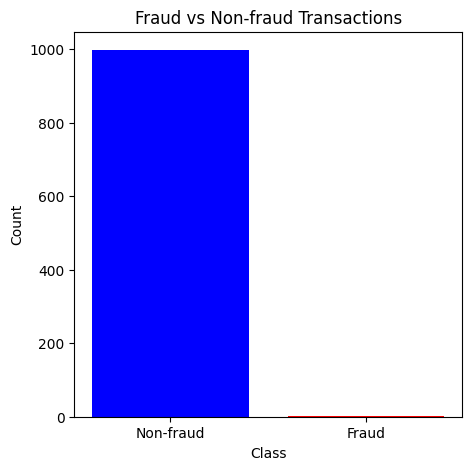

In [18]:
#plot the class distribution in the dataset 
class_count = df['class'].value_counts()
plt.figure(figsize = [5,5])
plt.bar(class_count.index, class_count.values, color = ['blue', 'red'], tick_label=['Non-fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraud vs Non-fraud Transactions')
plt.show()

From the above, we can see that the distribution of fraud and non-fraud transactions is highly imbalanced. There are 997 non-fraud transactions and only 2 fraud transactions, which means the quality of the model could be significantly impacted.  
Thus, we will use other tools to simulate some fraud dataset.

### Deal with the imbalance dataset 

As the class distribution is extemely imbalanced, in this section I will apply RandomOverSampler to increase the number of fraud transactions and ensure a more balanced dataset.

In [19]:
#Use SMOTE to handle the imbalance dataset 
list = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'
       ]

X = df[list]
y = df['class']
print('The original dataset shape: %s' % Counter(y))

#re-sample the dataset using RandomOverSampler
ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X, y)
print('The resampled dataset shape: %s' % Counter(y_res))

The original dataset shape: Counter({0: 997, 1: 2})
The resampled dataset shape: Counter({0: 997, 1: 997})


In [20]:
#Create a new dataframe using the resampled X and y
df_re = pd.DataFrame(X_res, columns = list)
df_re['class'] = y_res
df_re.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


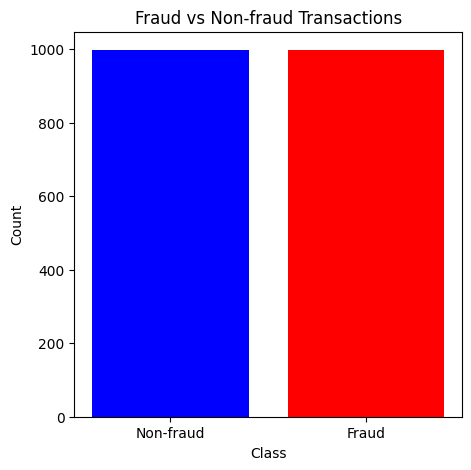

In [21]:
#Create the bin char to see the distribution of the target variable after re-sampling
class_count_res = y_res.value_counts()
plt.figure(figsize = [5,5])
plt.bar(class_count_res.index, class_count_res.values, color = ['blue', 'red'], tick_label=['Non-fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraud vs Non-fraud Transactions')
plt.show()

Now that the dataset has been re-sampled and balanced, we can proceed with feature engineering to identify which features may have a greater impact on the model’s performance.

In [22]:
#Standardard Scaler to Amount column

scaler = StandardScaler()
df_re['amount'] = scaler.fit_transform(df_re[['amount']])

#### Correlation Bar Plot

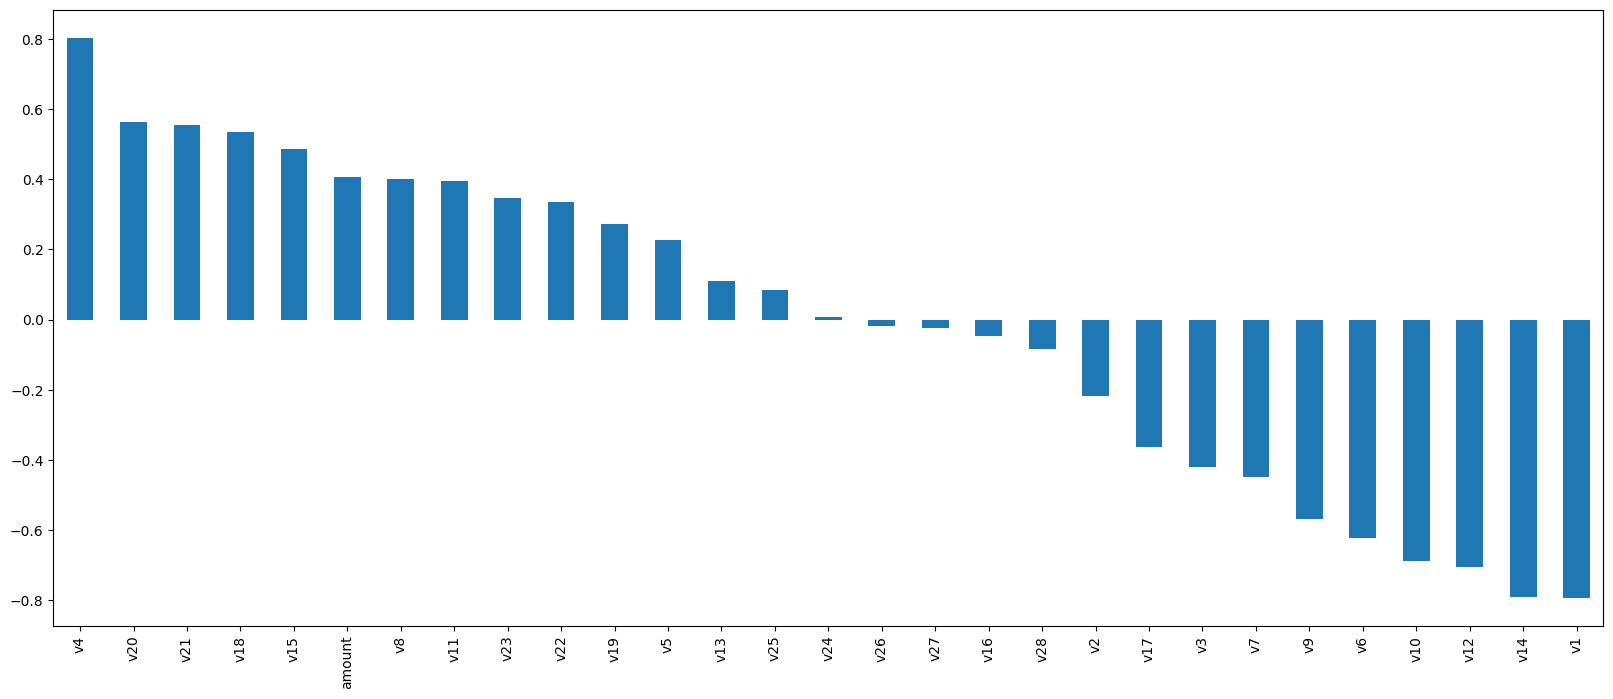

In [23]:
## Bar plot of Correlation with class 
plt.figure(figsize=(20,8))
df_re.corr()['class'].drop('class').sort_values(ascending = False).plot(kind='bar')
plt.show()

#### Pair Plot

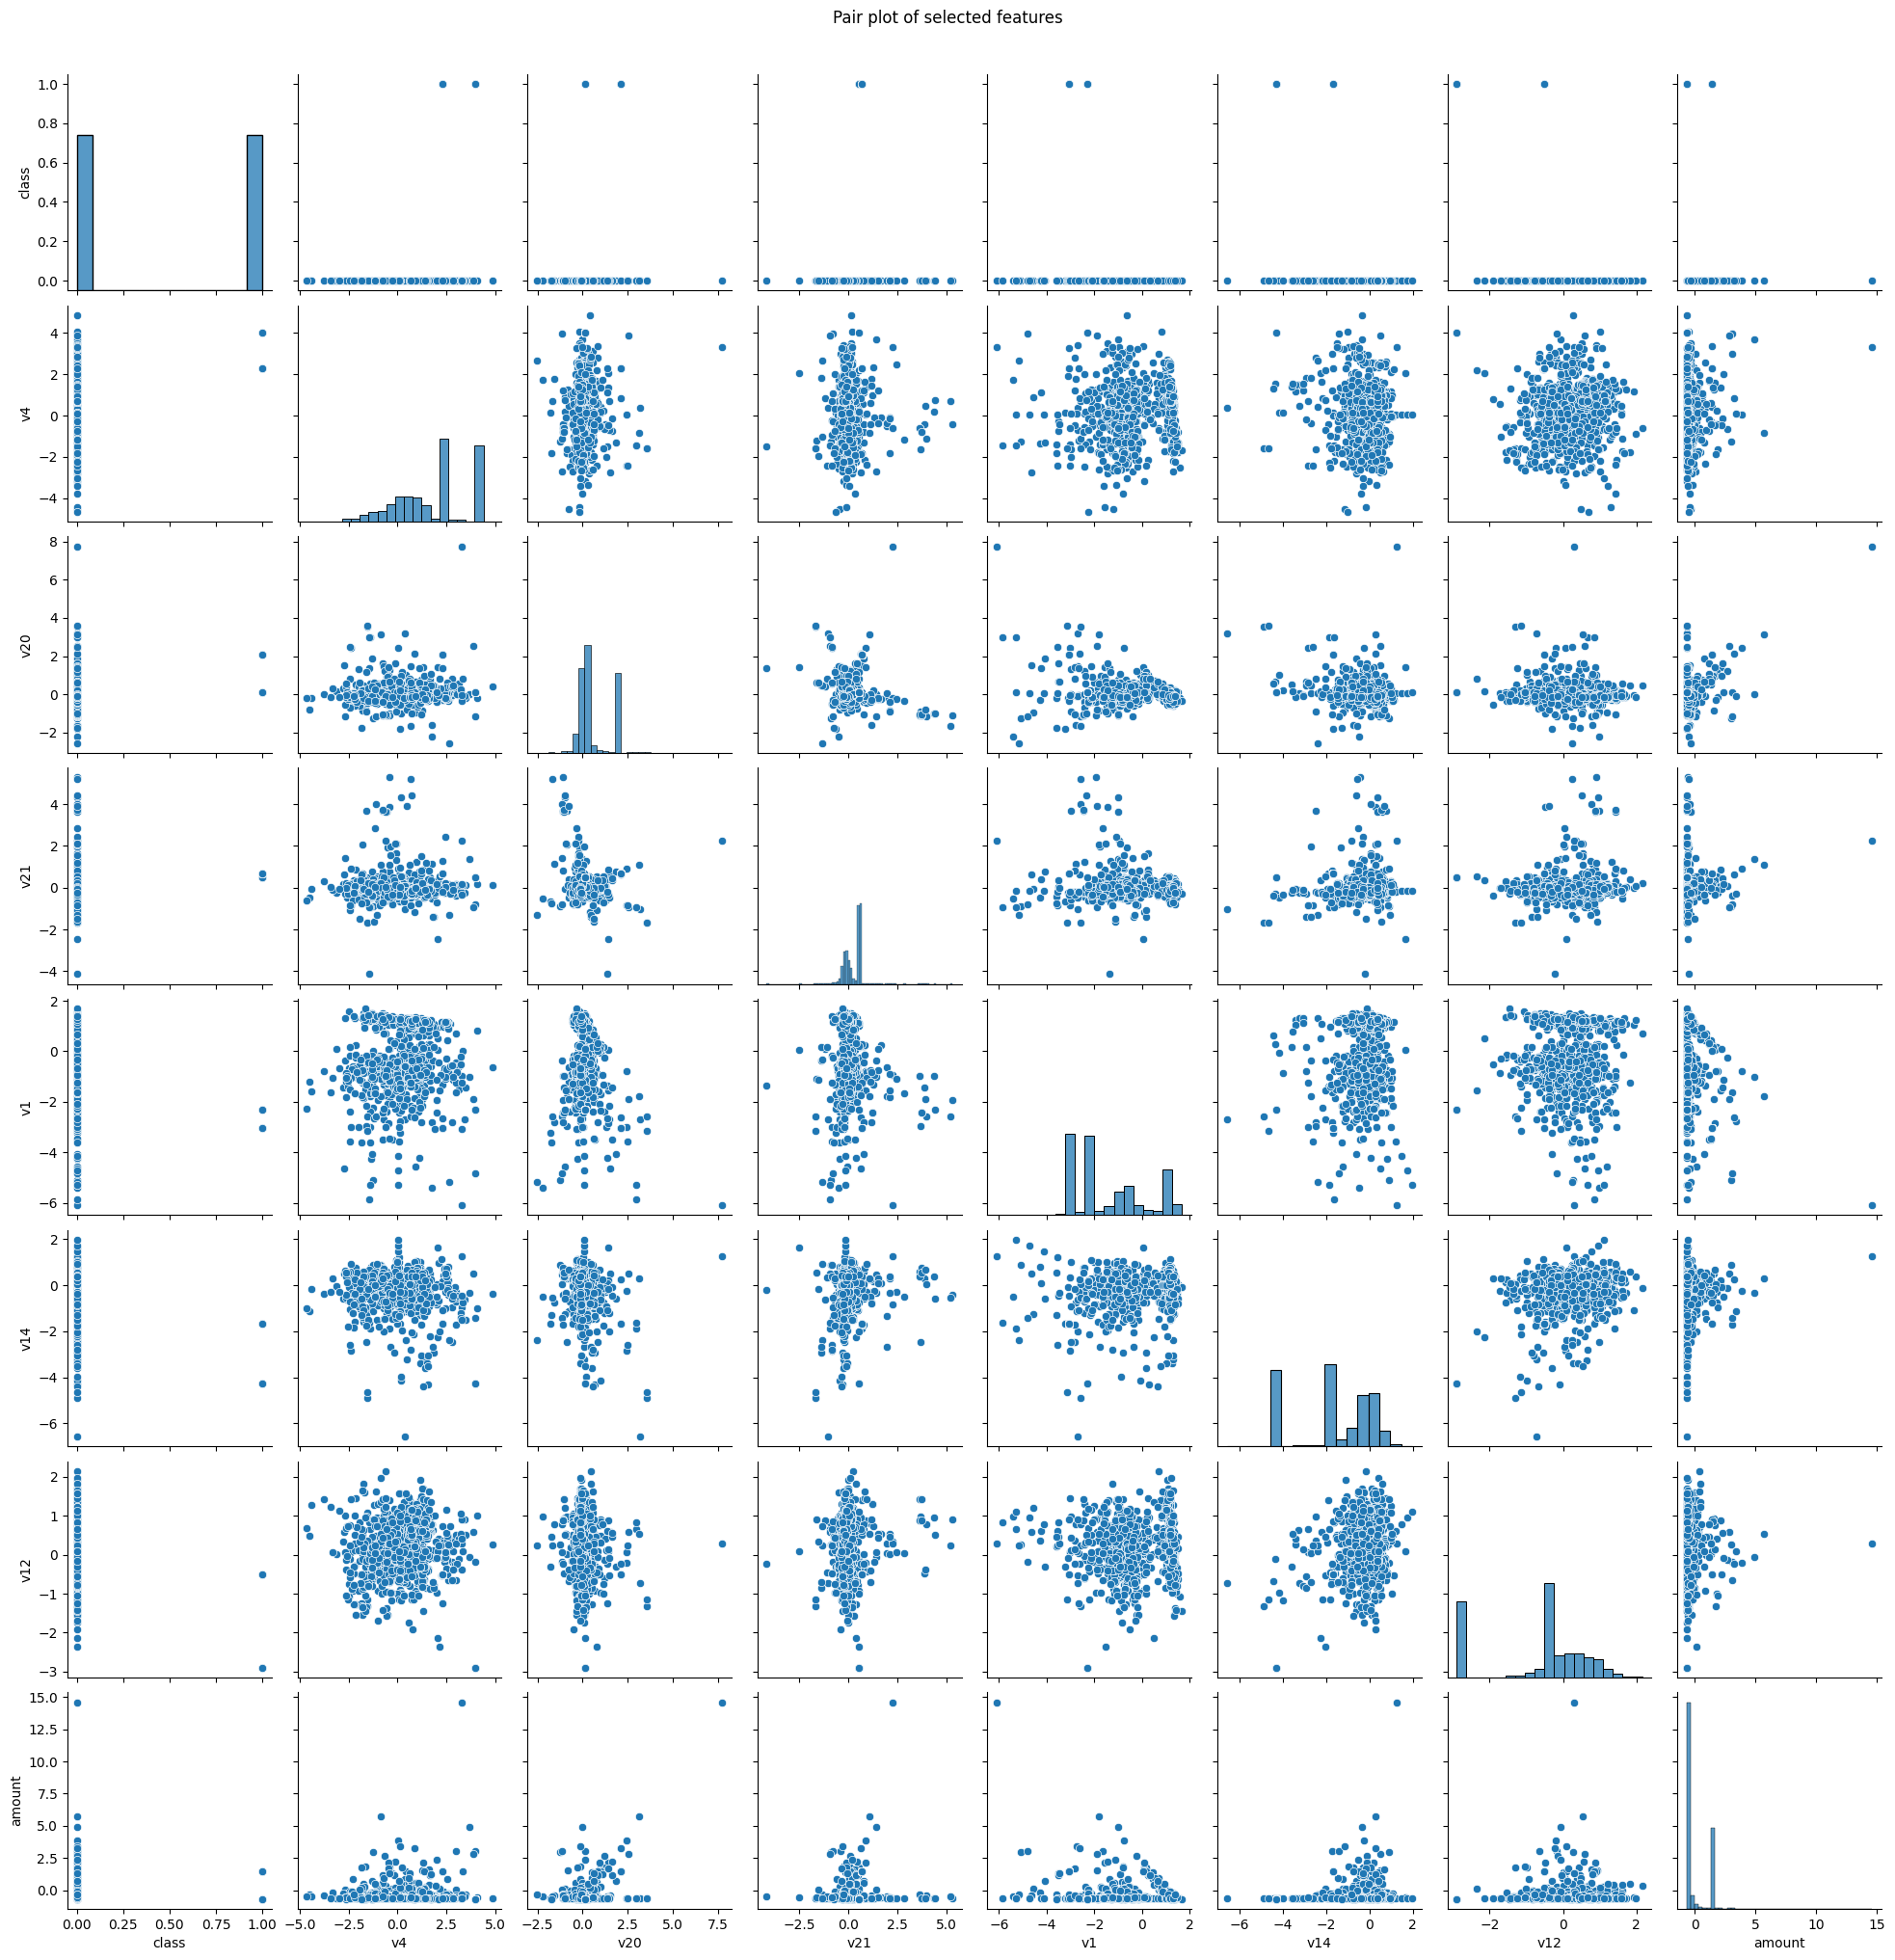

In [24]:
pair_plot = sns.pairplot(df_re[['class','v4', 'v20', 'v21', 'v1', 'v14', 'v12','amount']])
pair_plot.fig.suptitle("Pair plot of selected features", y=1.02)
plt.show()

As we can see from the above:  

1. V4, V20, and V21 have a stronger positive correlation with the target variable, which means that transactions with higher values in these features are more likely to be fraudulent.  

2. Meanwhile, V1, V14, and V12 have a stronger negative correlation with the target variable, which means that transactions with higher values in these features are less likely to be fraudulent.


### KDE plot - kernal Density Estimation 

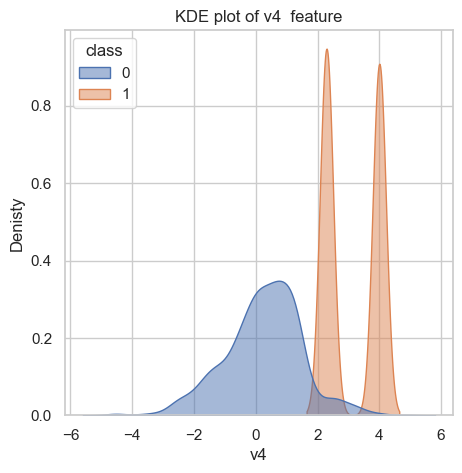

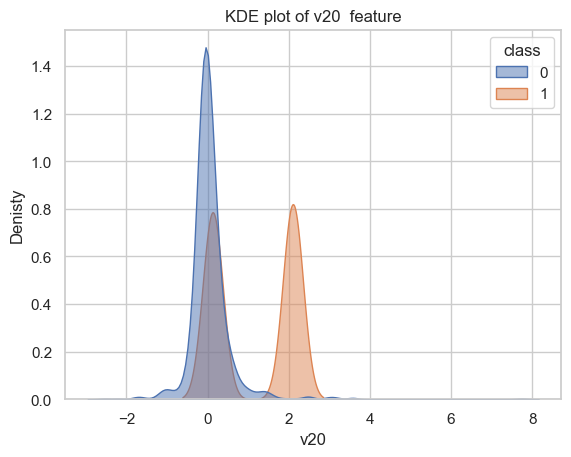

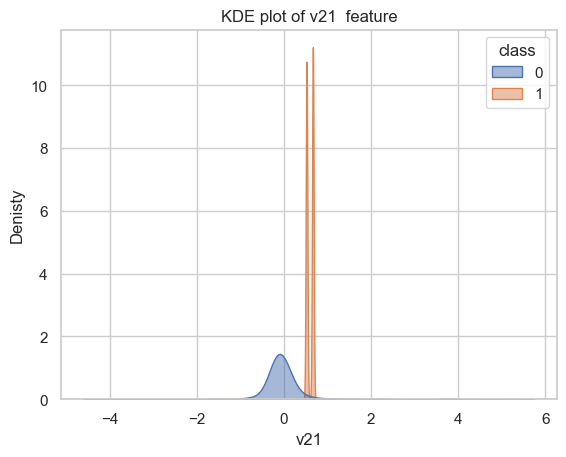

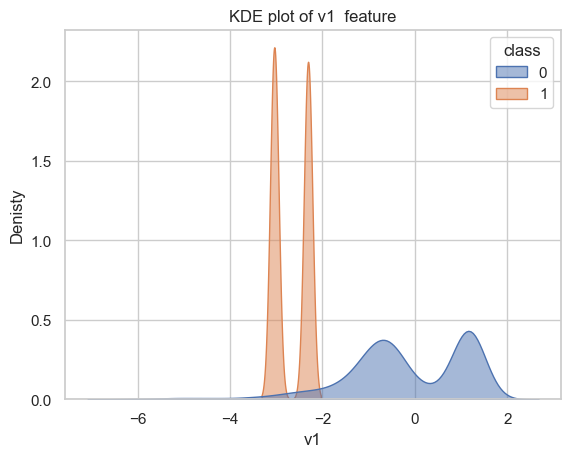

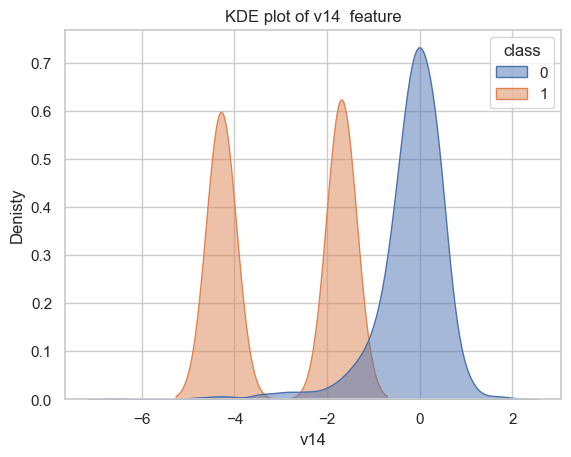

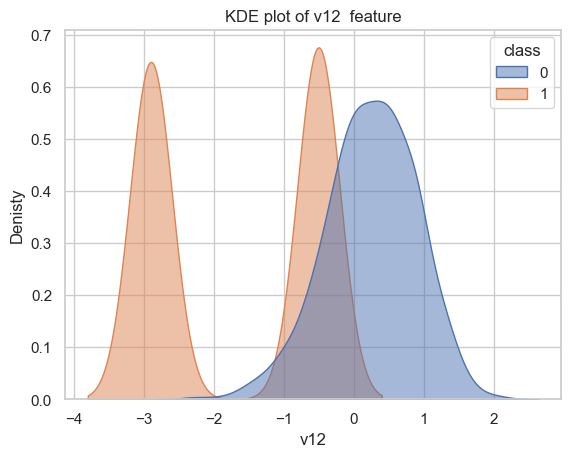

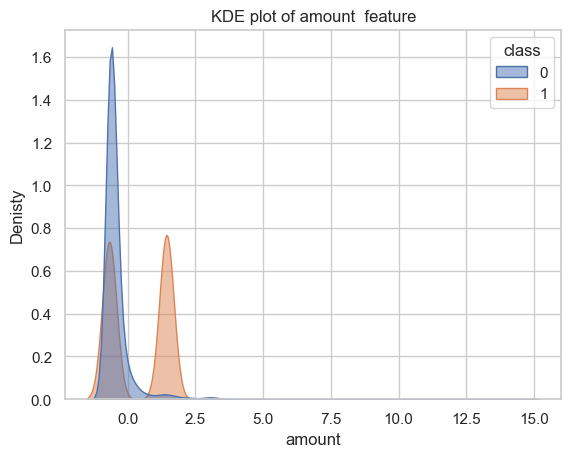

In [25]:
#create line plot for the selected features to see the trend 

sns.set_theme(style='whitegrid')
plt.figure(figsize = (5,5))

for feature in ['v4', 'v20', 'v21', 'v1', 'v14', 'v12','amount']:
    sns.kdeplot(data=df_re, x=feature, hue="class", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"KDE plot of {feature}  feature")
    plt.xlabel(f'{feature}')
    plt.ylabel('Denisty')
    plt.show()

Insights:  


1. V4 has a strong positive impact on determining whether a transaction is fraudulent; if the value of V4 is around 2 to 4, the transaction is highly likely to be fraudulent.  

2. V20 and V21 also show a relatively positive impact on detecting fraud, but the correlation is less obvious.  

3. V1 has a stronger negative impact on fraud detection; if the value of V1 is between -2 and 2, the transaction is less likely to be fraudulent.  

4. V14 and V12 show some negative impact on classification, but the effect is not very pronounced.  

5. Overall, there is no clear and strong linear correlation across most features.

### Histrogram

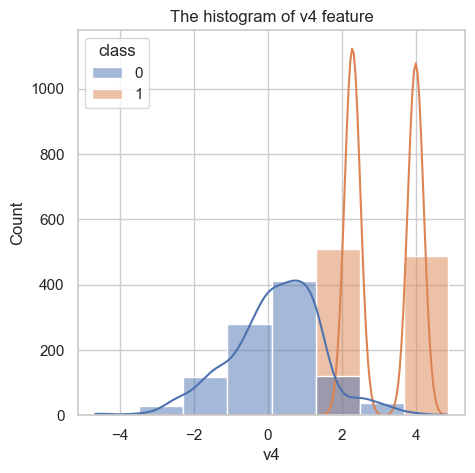

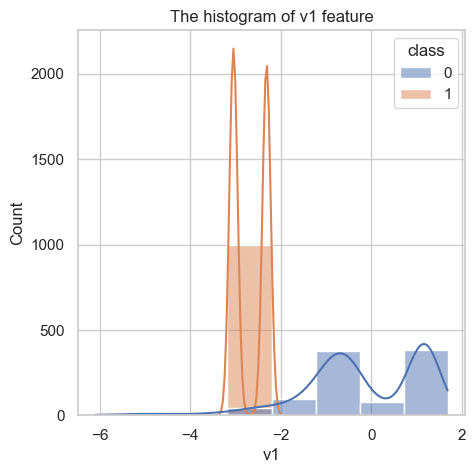

In [26]:
#Generate the histogram for V4 and V1
for feature in ['v4','v1']:
    plt.figure(figsize=(5,5))
    sns.histplot(data=df_re, x = feature, hue='class',bins= 8, kde=True)
    plt.title(f"The histogram of {feature} feature")
    plt.show()

Insights:   
1. In the V4 feature histogram, there are two sharp peaks around values 2 and 4. This further supports the finding that if a transaction’s V4 value is around 2 or 4, the transaction is highly likely to be fraudulent.  
2. In the V1 feature histogram, fraudulent transactions appear almost exclusively when V1 ≈ -3.5. This suggests that if a transaction’s V1 value falls between -2 and 2, it is much less likely to be fraudulent.

#### Violin plot

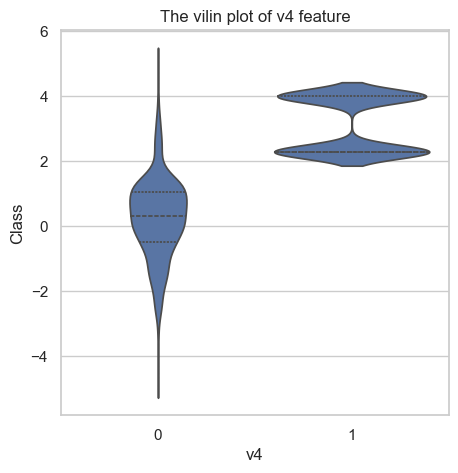

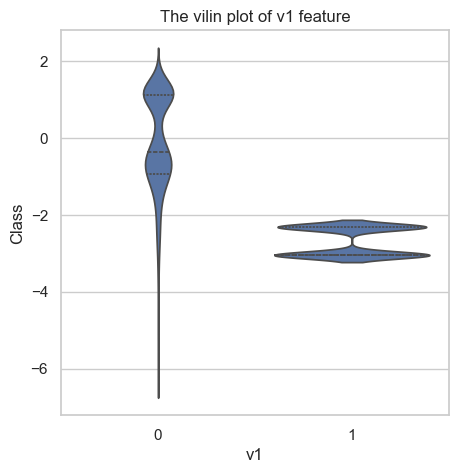

In [27]:
for feature in ['v4','v1']:
    plt.figure(figsize=(5,5))
    sns.violinplot(data=df_re, x = 'class', y=feature, inner='quartile')
    plt.title(f"The vilin plot of {feature} feature")
    plt.xlabel(f'{feature}')
    plt.ylabel('Class')
    plt.show()

Some questions to ask and answer:  
1. What feature(s) might determine if a transaction is fraudulent?  
    -- From the insights above, we can see that V4 has the strongest positive impact on detecting fraud (fraudulent transactions are highly concentrated around values 2 and 4), while V1 has the strongest negative impact (fraudulent transactions appear mostly around -3, and are absent in the 0–2 range). These features provide strong discriminative power in distinguishing fraud from non-fraud.

2. Who might be using this dataset? 
    -- This dataset could be used by bank security and fraud detection teams, data scientists, or researchers who are developing and testing models to identify fraudulent transactions. It is especially valuable for institutions that want to strengthen their real-time fraud monitoring systems.

3. Can we develop a model can immediately detect the fraud transcations and stop it?

## 4.Features Selection 

##### Filter Method + Embedded Method
Before applying any algorithm, use the Filter Method to initially select features based on the numerical features, which can save computing capcibility and avoid over-fitting. Then, use Embedded Method with algorithm to further select features. 

##### Filter Methods - ANOVA

In [28]:
# Define a function to train model the a Binary Logistic Regression Model
# By spliting the dataset into training and testing set, use training set to fit the model and test set to evaluate the model
# By calling this function, this function will print the accuracy of the model on the test set
def LoisticRegreesionClassifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  #use straify as the dataset is imbalanced

    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    print("Accuracy on test set:", np.round(model.score(X_test, y_test), 2))

In [29]:
# Call the function and print the accuracy
LoisticRegreesionClassifier(X, y)

Accuracy on test set: 1.0


C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that the accuracy is 1.0, which indicates that the model appears to be highly “correct.”   
However, considering that the dataset is highly imbalanced, we need to focus on other evaluation criteria, such as the recall rate and the confusion matrix, to further assess the model’s performance.

##### Embedded - Random Forest 

As all the features in this dataset is numerical, so we will use this method to perform feature selection during training the model. 

Features based on Random Forest Classifier:
v11       0.120305
v10       0.099819
v12       0.073884
v15       0.067913
v4        0.066984
v18       0.065297
v17       0.062640
v9        0.061061
v20       0.052858
amount    0.035539
dtype: float64


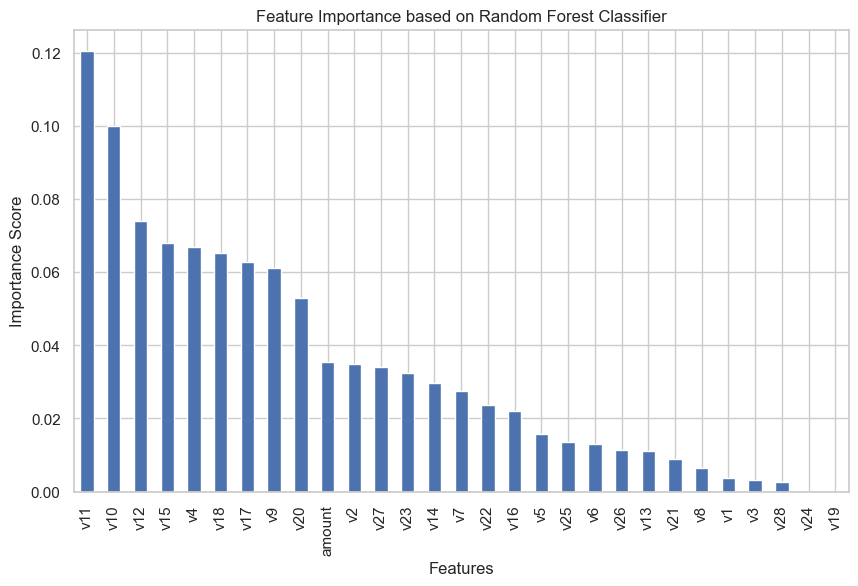

In [30]:
#assign model varible, and fit the model
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X, y)

#Get feature importance from the model
importances = pd.Series(rf.feature_importances_, index= X.columns)
importances = importances.sort_values(ascending=False)

#print top feature
print("Features based on Random Forest Classifier:")
print(importances.head(10))

#plot the feature importance
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title('Feature Importance based on Random Forest Classifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


Interpretation:

1. As the dataset is highly imbalanced, we should not focus solely on accuracy when training and fitting the model.

2. Although the accuracy is currently 1.0 — which appears to be a very high score — it does not necessarily mean that the model is performing well. This indicates that the model may be biased due to class imbalance, and techniques such as SMOTE should be applied before training.

3. To properly evaluate a model trained on an imbalanced dataset, we need to consider other performance metrics, such as recall rate and F1-score.

4. The top features identified in this dataset are V11, V10, and V12, suggesting that these features have the most significant impact on the target variable.


## 5.Supervised Machine Learning 

In the following section, I will use several supervised machine learning algorithms to train and improve the model, and then apply it to predict whether a transaction is fraudulent.  

The dataset size is not massive, and we already have an existing dataset containing transactions that have been identified as fraudulent, with a clear binary label.  

To improve the model’s performance, I will experiment with different algorithms and evaluate their results.  

To address the class imbalance issue, I will use a dataset that has been resampled using SMOTE.

I will evaluate each model through accuracy and confusion matrix, as the target varible is binary; if the target varbile is countius number, I might use Mean Absolute Error

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Define a function to evaluate the confusion matrix of the mode
def model_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = cm.ravel()

    cm_df = pd.DataFrame(
        [[tp,fn],[fp,tn]],
        index = ['Acutual Fraud','Acutual Non-fraud'],
        columns = ['Predicted Fraud','Predicted Non-fraud']
    )

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("\nConfusion Matrix\n\n", cm_df)

    print(f"\nTrue Positives (Fraud correctly predicted):{tp}")
    print(f"\nFalse Negative (Fraud predicted as Non-fraud):{fn}")
    print(f"\nFalse Postive (Non-Fraud predicted as Fraud):{fp}")
    print(f"\nTrue Negative (Non-Fraud predicted correctly):{tn}")
    print("--"*20)
    print(f"\nAccuracy:{accuracy:.2f}")
    print(f"\nPrecision (Fraud):{precision:.2f}")
    print(f"\nRecall (Fraud):{recall:.2f}")

In [32]:
#split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size =0.2 , random_state=42)

#### Linear Regression  

The baseline algorthm to work on a small size dataset for a ealiser and straignfoward result. 

In [33]:
# use the resampled dataset to train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test) #use the test dataset to predict and compare the resuslt for the evaluation


print("Logistic Regression Model Evaluation:")
model_confusion_matrix(y_test, y_lr_pred)

Logistic Regression Model Evaluation:

Confusion Matrix

                    Predicted Fraud  Predicted Non-fraud
Acutual Fraud                  192                    2
Acutual Non-fraud                0                  205

True Positives (Fraud correctly predicted):192

False Negative (Fraud predicted as Non-fraud):2

False Postive (Non-Fraud predicted as Fraud):0

True Negative (Non-Fraud predicted correctly):205
----------------------------------------

Accuracy:0.99

Precision (Fraud):0.99

Recall (Fraud):1.00


C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Interpretaion:  
1. Only 2 acutual fraud were incorrectly predicted;  
2. Both Accuracy, Precision and Recall rate are high, which means the performance of this model is good. 

#### Random Forest Regressor 
The Ensemble machine learning method

In [34]:
#call the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test) #use the test dataset to predict and compare the resuslt for the evaluation


print("Random Forest Regressor Model Evaluation:")
model_confusion_matrix(y_test, y_rf_pred)

Random Forest Regressor Model Evaluation:

Confusion Matrix

                    Predicted Fraud  Predicted Non-fraud
Acutual Fraud                  194                    0
Acutual Non-fraud                0                  205

True Positives (Fraud correctly predicted):194

False Negative (Fraud predicted as Non-fraud):0

False Postive (Non-Fraud predicted as Fraud):0

True Negative (Non-Fraud predicted correctly):205
----------------------------------------

Accuracy:1.00

Precision (Fraud):1.00

Recall (Fraud):1.00


Interpretaion:  
1. Both Accuracy, Precision and Recall rate are 1.0, which means the performance of this model is good. 
2. There are no fraud transcations incorrectly predicted, which means the model performance well in this dataset. 
3. Considering the dataset is small, Random Forest Regressor might be able to work well in this model. 

#### Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

#call the Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state = 42)
gb.fit(X_train, y_train)

y_gb_pred = gb.predict(X_test) #use the test dataset to predict and compare the resuslt for the evaluation


print("Gradient Boosting Regressor Model Evaluation:")
model_confusion_matrix(y_test, y_gb_pred)

Gradient Boosting Regressor Model Evaluation:

Confusion Matrix

                    Predicted Fraud  Predicted Non-fraud
Acutual Fraud                  194                    0
Acutual Non-fraud                0                  205

True Positives (Fraud correctly predicted):194

False Negative (Fraud predicted as Non-fraud):0

False Postive (Non-Fraud predicted as Fraud):0

True Negative (Non-Fraud predicted correctly):205
----------------------------------------

Accuracy:1.00

Precision (Fraud):1.00

Recall (Fraud):1.00


Interpretaion:  
1. Both Accuracy, Precision and Recall rate are 1.0, which means the performance of this model is good. 
2. There are no fraud transcations incorrectly predicted, which means the model performance well in this dataset. 
3. Considering the dataset is small, Random Forest Regressor might be able to work well in this model. 

#### Support Vector Regressir (SVR)

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

#call the Support Vector Classifier
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled)

y_svr_pred = svr.predict(X_test_scaled) #use the test dataset to predict and compare the resuslt for the evaluation


print("Support Vector Regressor Model Evaluation:")
# Evaluation metrics
mae = mean_absolute_error(y_test_scaled,y_svr_pred)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_svr_pred))
r2 = r2_score(y_test_scaled, y_svr_pred)

print(f"R² Score: {r2:.2f}")

# Show first 10 test predictions
results_df = pd.DataFrame({
    "Actual": y_test_scaled[:10],
    "Predicted": y_svr_pred[:10],
    "Error": np.abs(y_test[:10] - y_svr_pred[:10])
})
print("\nFirst 10 Predictions:")
print(results_df)

Support Vector Regressor Model Evaluation:
R² Score: 0.99

First 10 Predictions:
        Actual  Predicted     Error
889  -0.993127  -0.989801  0.989801
1672  1.006920   0.906797  0.093203
414  -0.993127  -1.024386  1.024386
1599  1.006920   0.906808  0.093192
849  -0.993127  -1.061814  1.061814
1658  1.006920   0.906797  0.093203
926  -0.993127  -0.936675  0.936675
1670  1.006920   0.906797  0.093203
1448  1.006920   0.906797  0.093203
1216  1.006920   0.906808  0.093192


Interpretation:  
The R2 score measure how well a model explanins the variation of the target variable. The R2 score for SVR model is very closed to 1, which means the model performaces very outstanding in this dataset. 

Overall Models Performance:
1. The dataset is small and imbalanced, which means models may achieve high accuracy or a high R² score.

2. Based on the confusion matrix, we can see that the ensemble methods (Random Forest Regressor and Gradient Boosting Classifier) perform better than the linear methods.

3. The SVR model also achieves satisfactory performance in predicting fraudulent transactions.

#### Overfitting & Underfitting  

As using all 29 features will waste the computing resouces, I will use the Top1 feature to train the model

Instance 1 -> Train RMSE: 0.46, Test RMSE: 0.45
Instance 3 -> Train RMSE: 0.36, Test RMSE: 0.35
Instance 15 -> Train RMSE: 0.26, Test RMSE: 0.67


C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


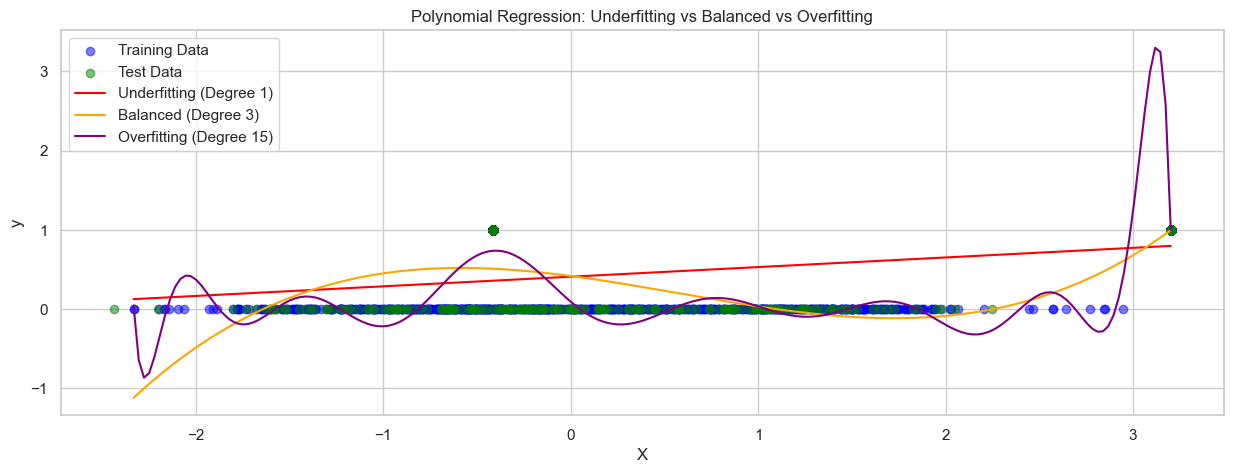

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

X_train_1= X_train[['v11']]
X_test_1 = X_test[['v11']]


# define a function to create polynomial regression model
def poly_regression(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_1, y_train)
    y_train_pred = model.predict(X_train_1)
    y_test_pred = model.predict(X_test_1)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"Instance {degree} -> Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    return y_train_pred, y_test_pred

#Underfitting example (degree =1)
y_train_pred1, y_test_pred1 = poly_regression(1)

#Balanced example (degree =3)
y_train_pred3, y_test_pred3 = poly_regression(3)

#Overfitting example (degree =15)
y_train_pred15, y_test_pred15 = poly_regression(15)

#Visualize the polynomial regression results
plt.figure(figsize = (15,5))
plt.scatter(X_train_1, y_train, color="blue", label="Training Data", alpha=0.5)
plt.scatter(X_test_1, y_test, color="green", label="Test Data", alpha=0.5)

X_plot = np.linspace(X_train_1.min(), X_train_1.max(), 200).reshape(-1, 1)

for degree, color, label in zip([1, 3,15], ["red", "orange","purple"], ["Underfitting (Degree 1)", "Balanced (Degree 3)","Overfitting (Degree 15)"]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_1, y_train)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color=color, label=label)

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression: Underfitting vs Balanced vs Overfitting") 
plt.show()

From the above diagram, we can see that a lower polynomial degree means the model has less capacity to fit the data.  
When the degree is 1, the red line is far from both the training and test data points, showing underfitting.  
When the degree is 3, the orange line stays close to the data points, indicating a good fit.  
However, when the degree is 15, the line follows the training data very closely but fluctuates a lot, showing overfitting.  
This means that when the degree is too high, the model achieves higher accuracy on the training data but performs poorly on unseen data because it fails to generalize.  

### Explainable AI  
In this section, we find out why Random Forest Regressor from the above, and improve the model. 

In [60]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.9 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/12.9 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 2.6/12.9 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 2.9/12.9 MB 2.9 MB/s eta 0:00:04
   ---------- ----------------------------- 3.4/12.9 MB 2.9 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.9 MB 2.8 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/12.9 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 5.2/12.9 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/12.9 MB 2

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\kimwo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 13.4 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\kimwo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [75]:
y_test

889     0
1672    1
414     0
1599    1
849     0
       ..
909     0
261     0
576     0
963     0
240     0
Name: class, Length: 399, dtype: int64

In [78]:


df_pred = pd.DataFrame({
    'True': y_test,
    'Predicted': y_rf_pred
})


df_pred_1 = df_pred[df_pred['Predicted'] == 1]
print(df_pred_1.head())

      True  Predicted
1672     1          1
1599     1          1
1658     1          1
1670     1          1
1448     1          1


In [89]:
#import library for Explainable AI
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.text as mtext
import shapely,shap
shap.initjs()

feature_names = X_train.columns.tolist()

#Use LIME to explain the Random Forest Classifier model
explainer = LimeTabularExplainer(
    training_data = X_train.values, 
    feature_names = feature_names,
    mode = "regression"
)

#pick a test instance when predicting non-fraud
i1 = 20
exp1 = explainer.explain_instance(
    data_row = X_test.iloc[i1],
    predict_fn = rf.predict
)

#pick a test instance when predicting fraud
i2 = 1599
exp2 = explainer.explain_instance(
    data_row = X_test.loc[i2],
    predict_fn = rf.predict
)


# convert LIME results to DataFrame
df_explanation1 = pd.DataFrame(exp1.as_list(), columns=['Feature', 'Contribution'])
df_explanation2 = pd.DataFrame(exp2.as_list(), columns=['Feature', 'Contribution'])



#print the result
print("True Value:", y_test.iloc[i1])
print("Predicted Value:", rf.predict([X_test.iloc[i1]])[0])
print(df_explanation1)
print("*"*50)
print("True Value:", y_test.loc[i2])
print("Predicted Value:", rf.predict([X_test.loc[i2]])[0])
print(df_explanation2)






C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\

True Value: 0
Predicted Value: 0
                  Feature  Contribution
0            v21 <= -0.08     -0.015272
1              v4 <= 0.32     -0.014112
2     -0.50 < v12 <= 0.28     -0.012344
3     -1.06 < v6 <= -0.14     -0.012301
4    -0.84 < v10 <= -0.09     -0.008470
5    -1.69 < v14 <= -0.06     -0.008458
6      0.13 < v20 <= 2.10      0.006470
7    -0.41 < v11 <= -0.11      0.005643
8     -2.31 < v1 <= -0.38     -0.005032
9  0.78 < amount <= 18.00      0.004994
**************************************************
True Value: 1
Predicted Value: 1
               Feature  Contribution
0            v4 > 2.97      0.045946
1         v14 <= -2.53      0.022177
2  -0.08 < v21 <= 0.52     -0.019572
3          v6 <= -1.42      0.017239
4         v12 <= -1.16      0.015325
5  -0.01 < v20 <= 0.13     -0.010075
6          v7 <= -1.53      0.007713
7           v11 > 1.90      0.005983
8         v10 <= -1.49      0.004741
9          v25 <= 0.04     -0.004554


C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future

PermutationExplainer explainer: 400it [01:24,  4.18it/s]                         



SHAP Values for the instance:


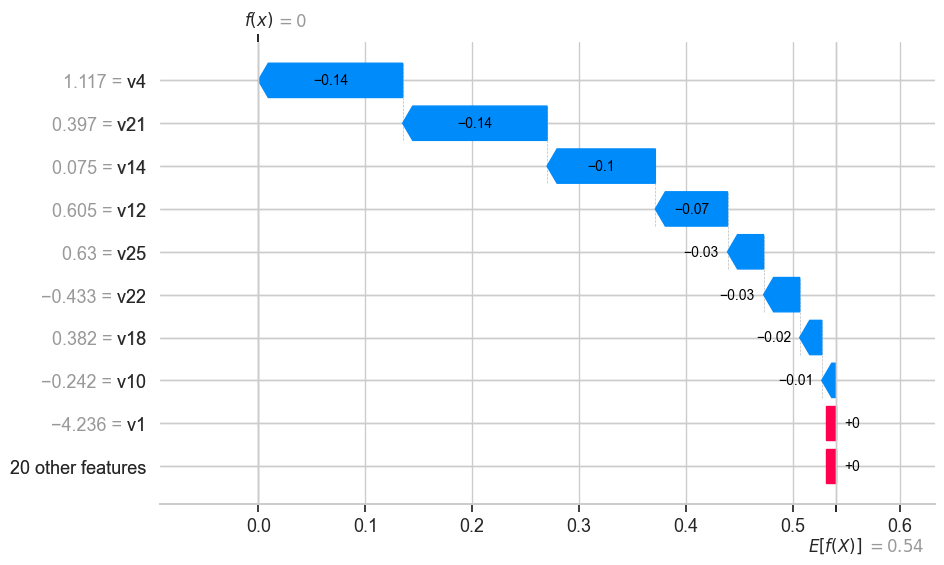

In [82]:
# Get explanation as table 
explanation_list = exp.as_list()
df_explanation = pd.DataFrame(explanation_list, columns=['Feature', 'Contribution'])

#create SHAP explainer
shap_explainer = shap.Explainer(rf.predict, X_test, feature_names = feature_names)
shap_values = shap_explainer(X_test)

test_instance_index = 10
shap_values[test_instance_index]

print("\nSHAP Values for the instance:")
#create the SHAP plot for the instance 
ax = shap.plots.waterfall(shap_values[test_instance_index],show=False)
fig = ax.figure
fig.set_size_inches(10,6)

for ax in fig.axes:
    for child in ax.get_children():
        if isinstance(child, mtext.Text):
            child.set_fontsize(10)
            child.set_color('black')
plt.show()

Interpretation:  
1. The above LIME results show that when predicting a fraudulent transaction (predicted value = 1), v4 and v14 make the strongest positive contributions to the prediction, indicating that these two features are highly associated with fraudulent behavior. In contrast, v21 shows a negative contribution, meaning that higher values of v21 decrease the likelihood of fraud.

2. When predicting a non-fraudulent transaction (predicted value = 0), the most influential features — v21, v4, and v12 — have negative contributions, thereby reducing the probability of fraud.

3. From the SHAP analysis above, we can observe that v4, v21, v14, and v12 are the key features contributing to the model’s fraud prediction decisions.

### Model Improving
The above section indicates that **v14, v10,v4, v17 and v12** have a higher impact/importance on predicting target.

In [90]:
#set the new features 
list_new = ['v14', 'v10','v4', 'v17', 'v12']
X = df_re[list_new]
y = df_re['class']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.7, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test) #use the test dataset to predict and compare the resuslt for the evaluation


print("Random Forest Regressor Model Evaluation:")
model_confusion_matrix(y_test, y_rf_pred)

Random Forest Regressor Model Evaluation:

Confusion Matrix

                    Predicted Fraud  Predicted Non-fraud
Acutual Fraud                  300                    0
Acutual Non-fraud                0                  299

True Positives (Fraud correctly predicted):300

False Negative (Fraud predicted as Non-fraud):0

False Postive (Non-Fraud predicted as Fraud):0

True Negative (Non-Fraud predicted correctly):299
----------------------------------------

Accuracy:1.00

Precision (Fraud):1.00

Recall (Fraud):1.00


The result does not have much improvement, as the dataset is too small. 

### conclusion & Next Step  
  
#### Conclusion  
1. Fraud Transactions tend to be slightly different in the amount spent 
2. v14, v10,v4, v17, v12 are some features that significantly impact on the fraud detection  
3. The model with the best parameter set can predict fraud transactions in 99.93% accuracy   

#### Next Step
1. Need to deploy model, including standardised pre-processing and cleaning process to create the pipeline 
2. Reducing sample numbers to increase computing speed. Using small-qty but higher batch/repetition to improve hyperparameter tunning results
3. As the results from the initial model training are perfectly high, no significant improvement after hyperparameter tunning and feature importance
4. Keep improving the notebook to be tidy and the code to be efficient 